# TASK 1 
Predicting the score of a student based on the number of study hours . 

1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read data
url = "http://bit.ly/w-data" #dataset
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


2. Plot a Graph 

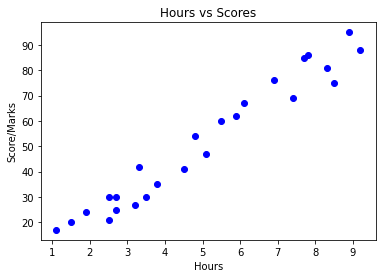

In [3]:
# Simple line plot 
x=data['Hours']
y=data['Scores']

# Plot
plt.scatter(x,y,c='blue')

# Decorate
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Score/Marks')

plt.show()


From the above graph we see that relation between hours and scores is linear. Hence for analysis , we use linear regression . 


a line is represented by y=mx+b . x and y are the variables , m is the slope and b is the y-intercept . 

In [4]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) # test size is 0.2 as we consider 20% of the sample as test set 


from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Model trained.")

Model trained.


In [5]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.018160041434662


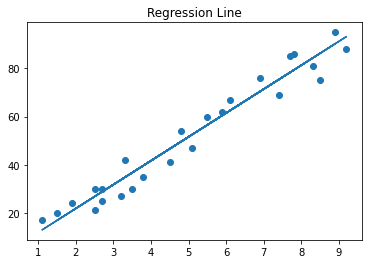

In [7]:
# Plotting for the test data
l = model.coef_*x+model.intercept_
plt.title('Regression Line')
plt.scatter(x, y)
plt.plot(x, l)
plt.show()


In [8]:
y_pred = model.predict(X_test)

In [9]:
datafrm = pd.DataFrame({'Hours': X_test[:,0], 'Actual Score': y_test, 'Predicted Score': y_pred})  
datafrm

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


For 9.25 study hours 

In [10]:
print('Number of hours: 9.25')
print('Predicted score: ', model.predict([[9.25]])[0])

Number of hours: 9.25
Predicted score:  93.69173248737539


EVAUATION - The accuracy of the model

In [11]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )


Mean absolute error: 4.18
Residual sum of squares (MSE): 21.60
R2-score: 0.95
